# Formula

![](ymxb.png)

![](ymxb.gif)

# Linear Regression with Python

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

**Let's get started!**
## Check out the data
We've been able to get some data from your neighbor for housing prices as a csv set, let's get our environment ready with the libraries we'll need and then import the data!
### Import Libraries

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [151]:
x = np.random.randint(0,50,100)
y = np.random.randint(0,20,100)

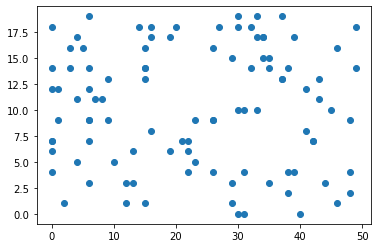

In [152]:
plt.scatter(x,y)

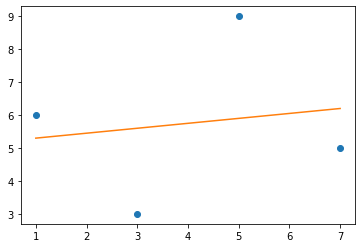

In [153]:
x = np.array([1, 3, 5, 7])
# generate data

y = np.array([ 6, 3, 9, 5 ])
plt.plot(x, y, 'o')
# create scatter plot


m, b = np.polyfit(x, y, 1)
# m = slope, b=intercept

y = m*x + b
plt.plot(x,y)

### Check out the Data

In [154]:
# load the data
data= pd.read_csv('USA_Housing.csv')

In [158]:
# see head
data.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09     23086.800503  1.059034e+06  
1                          3.09     40173.072174  1.505891e+06  
2                          5.13     36882.159400  1.058988e+06  
3                          3.26     34310.242831  1.260617e+06  
4                          4.23     26354.109472  6.309435e+05

In [157]:
data.drop(columns=['Address'],inplace=True)

In [160]:
# print the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [161]:
data.shape

(5000, 6)

In [162]:
# describe the data
data.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [163]:
# print the columns
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

# Exploratory Data Analysis

Let's create some simple plots to check out the data!

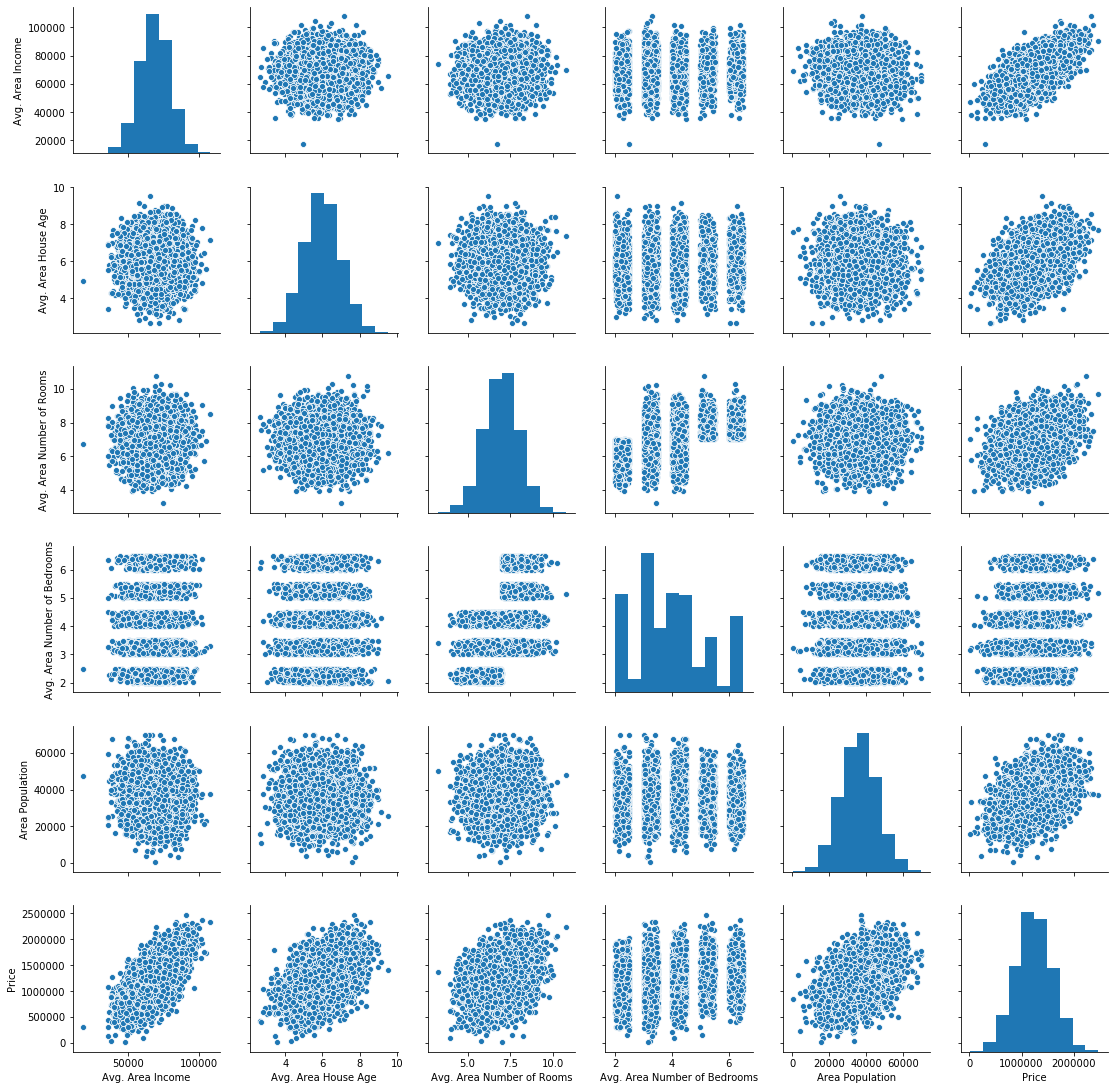

In [164]:
sns.pairplot(data)
# plor pairs of data and visualize them

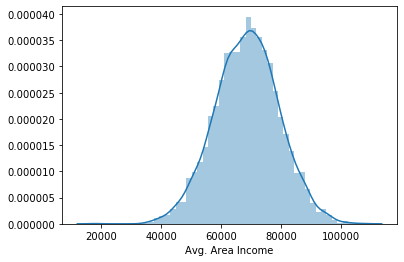

In [166]:
# distribution histogram
sns.distplot(data['Avg. Area Income'])

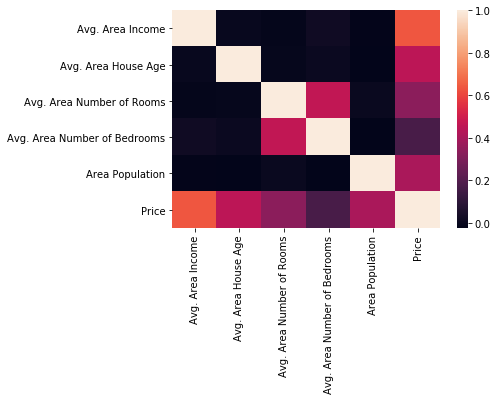

In [167]:
# correlation plot
sns.heatmap(data.corr())

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [168]:
# X and y Split of Dataframe
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

In [170]:
X.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population  
0                          4.09     23086.800503  
1                          3.09     40173.072174  
2                          5.13     36882.159400  
3                          3.26     34310.242831  
4                          4.23     26354.109472

In [172]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [103]:
from sklearn.model_selection import train_test_split

In [173]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [174]:
X_train.shape

(4000, 5)

In [176]:
y_train.shape

(4000,)

In [175]:
X_test.shape

(1000, 5)

In [177]:
y_test.shape

(1000,)

## Creating and Training the Model

In [178]:
# import Linear Regression from SKlean
from sklearn.linear_model import LinearRegression

In [179]:
# Initiate Linear Regression class as model
lm = LinearRegression()

In [180]:
# fit the model
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [213]:
# print the intercept
print(lm.intercept_)

-2640441.399781402


In [214]:
# Coefficient dataframe
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Avg. Area Income                  21.566696
Avg. Area House Age           165453.042478
Avg. Area Number of Rooms     120499.839093
Avg. Area Number of Bedrooms    1999.785336
Area Population                   15.340604

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

Does this make sense? Probably not because I made up this data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [191]:
x = [[79248.642455,6.002900,6.730821,3.09,40173.072174]]

In [200]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Value')

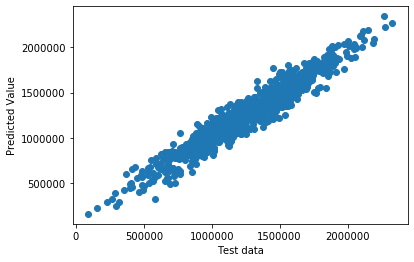

In [217]:
plt.scatter(y_test,predictions)
plt.xlabel('Test data')
plt.ylabel('Predicted Value')

**Residual Histogram**

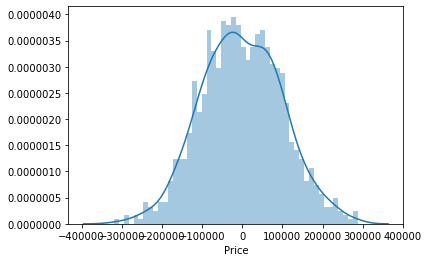

In [183]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [ ]:
from sklearn import metrics

In [197]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81305.23300085646
MSE: 10100187858.864882
RMSE: 100499.69083964826


In [212]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df

Actual     Predicted
1718  1.251689e+06  1.257920e+06
2511  8.730483e+05  8.221124e+05
345   1.696978e+06  1.740669e+06
2521  1.063964e+06  9.724521e+05
54    9.487883e+05  9.934223e+05
...            ...           ...
3900  1.466412e+06  1.457833e+06
3753  1.222412e+06  1.327013e+06
3582  1.404622e+06  1.365625e+06
2392  9.100996e+05  1.065213e+06
3343  1.188197e+06  1.097281e+06

[1000 rows x 2 columns]

In [198]:
from sklearn.metrics import classification_report

In [202]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
3900    1.466412e+06
3753    1.222412e+06
3582    1.404622e+06
2392    9.100996e+05
3343    1.188197e+06
Name: Price, Length: 1000, dtype: float64

In [204]:
predictions.shape

(1000,)

# Exercise

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47
(20, 1)
(20,)


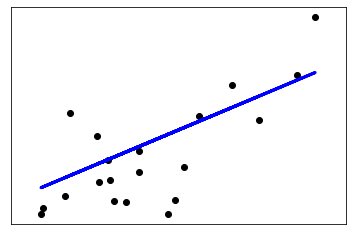

In [215]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
print(diabetes_X_test.shape)
print(diabetes_y_pred.shape)
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()